$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Assignment 1: Sampling and recovering of a signal

We will see the sampling and recovering process using a bunch of different signals.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy import signal

In [13]:
def Recovering(t, s_amos, Ts):
    s = 0
    for i in range(len(s_amos)):
        s += s_amos[i]*np.sin(np.pi*(t - i*Ts)/Ts) / (np.pi*(t - i*Ts)/Ts)
    return s

In [14]:
class Signal():
    def __init__(self, t):
        self.t = t
    
    def constant(self, A):
        x = A*np.linspace(1, 1, len(self.t))
        return x
    
    def sine(self, A, f, phi):
        x = A*np.sin(2*np.pi*f*self.t + phi)
        return x
    
    def cosine(self, A, f, phi):
        x = A*np.cos(2*np.pi*f*self.t + phi)
        return x
    
    def squareWave(self, A, T):
        x = A*signal.square(2*np.pi*self.t/T, 0.5)
        return x
    
    def triangularWave(self, A, T):
        x = A*signal.sawtooth(2*np.pi*self.t/T, 0.5)
        return x
    
    def noise(self, σ, μ):
        x = normal(μ, σ, len(self.t))
        return x

In [15]:
t_max = 10                        # Duration of the signal
t = np.linspace(0, t_max, 1000)

Fs = 5                            # Sampling frequency
Ts = 1/Fs                         # Sampling period

n = np.arange(0, t_max, Ts)       # Sampling instants


Olá! Qual função deseja analisar?
 1 - Constant
 2 - Sine
 3 - Cosine
 4 - Square wave
 5 - Triangular wave
 6 - Noise
5
Amplitude: 1

Period: 2


<ipython-input-13-3eeabce38ca6>:4: RuntimeWarning: invalid value encountered in true_divide
  s += s_amos[i]*np.sin(np.pi*(t - i*Ts)/Ts) / (np.pi*(t - i*Ts)/Ts)


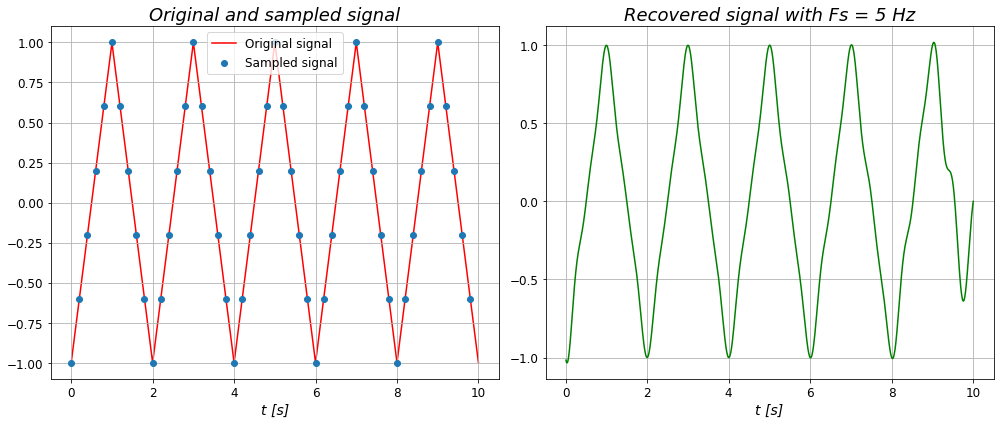

\Do you want to do another transform?
 y 
 n 
n


In [17]:
s_orig = Signal(t)
s_amos = Signal(n)

d = 'y'

while(d == 'y'):
    fig, axs = plt.subplots(1, 2, figsize = (14, 6))
    
    i = int(input('\nOlá! Qual função deseja analisar?\n 1 - Constant\n 2 - Sine\n 3 - Cosine\n 4 - Square wave\n 5 - Triangular wave\n 6 - Noise\n'))
    
    if(i == 1):
        A = float(input('Amplitude: '))
        
        s1 = s_orig.constant(A)
        s2 = s_amos.constant(A)
        
    elif(i == 2):
        A = float(input('Amplitude: '))
        f = float(input('\nFrequency: '))
        phi = float(input('\nFase: '))
        
        s1 = s_orig.sine(A, f, phi)
        s2 = s_amos.sine(A, f, phi)
        
    elif(i == 3):
        A = float(input('Amplitude: '))
        f = float(input('\nFrequency: '))
        phi = float(input('\nFase: '))
        
        s1 = s_orig.cosine(A, f, phi)
        s2 = s_amos.cosine(A, f, phi)
        
    elif(i == 4):
        A = float(input('Amplitude: '))
        T = float(input('\nPeriod: '))
        
        s1 = s_orig.squareWave(A, T)
        s2 = s_amos.squareWave(A, T)
        
    elif(i == 5):
        A = float(input('Amplitude: '))
        T = float(input('\nPeriod: '))
        
        s1 = s_orig.triangularWave(A, T)
        s2 = s_amos.triangularWave(A, T)
        
    else:
        σ = float(input('Standard deviation: '))
        μ = float(input('\nMean: '))
        
        s1 = s_orig.noise(σ, μ)
        s2 = s_amos.noise(σ, μ)
    
    axs[0].plot(t, s1, 'r', zorder = 1, label = 'Original signal')
    axs[0].scatter(n, s2, zorder = 2, label = 'Sampled signal')
    axs[0].set_title('Original and sampled signal', fontsize = 18, fontstyle = 'italic')
    axs[0].set_xlabel('t [s]', fontsize = 14, fontstyle = 'italic')
    axs[0].tick_params(axis = 'both', labelsize = 12)
    axs[0].legend(fontsize = 12)
    axs[0].grid()
    
    axs[1].plot(t, Recovering(t, s2, Ts), 'g')
    axs[1].set_title('Recovered signal with Fs = '+str(Fs)+' Hz', fontsize = 18, fontstyle = 'italic')
    axs[1].set_xlabel('t [s]', fontsize = 14, fontstyle = 'italic')
    axs[1].tick_params(axis = 'both', labelsize = 12)
    axs[1].grid()
    plt.tight_layout()
    plt.show()
    
    
    d = input('\Do you want to do another transform?\n y \n n \n')

del s_orig
del s_amos